In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Загрузка данных
df = pd.read_csv("sample_data/Global_Cybersecurity_Threats_2015-2024.csv")

# Удаляем пропущенные значения
df = df.dropna()

# Названия колонок
target_col = 'Target Industry'

# Автоматически определим строковые колонки и закодируем
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Кодируем целевую переменную
target_encoder = LabelEncoder()
df[target_col] = target_encoder.fit_transform(df[target_col])

# Разделяем данные
X = df.drop(target_col, axis=1)
y = df[target_col]

# Масштабируем признаки
X = StandardScaler().fit_transform(X)

# Делим выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Преобразуем данные в тензоры
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test_tensor  = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Архитектура сети
class CyberThreatNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CyberThreatNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.model(x)

model = CyberThreatNN(input_size=X.shape[1], num_classes=len(set(y)))
criterion = nn.CrossEntropyLoss()

# Обучение
optimizer = optim.Adam(model.parameters(), lr=0.0005)
epochs = 50

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# Тестирование
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = predictions.argmax(dim=1)
    print("\nКлассификационный отчёт:")
    print(classification_report(y_test_tensor, predicted_classes))

Epoch 0: Loss = 1.9530
Epoch 10: Loss = 1.9472
Epoch 20: Loss = 1.9453
Epoch 30: Loss = 1.9418
Epoch 40: Loss = 1.9393

Классификационный отчёт:
              precision    recall  f1-score   support

           0       0.13      0.07      0.09        91
           1       0.19      0.11      0.14        84
           2       0.00      0.00      0.00        81
           3       0.05      0.03      0.03        80
           4       0.14      0.76      0.24        88
           5       0.00      0.00      0.00        90
           6       0.00      0.00      0.00        86

    accuracy                           0.14       600
   macro avg       0.07      0.14      0.07       600
weighted avg       0.07      0.14      0.07       600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 0: Loss = 1.9377
Epoch 1: Loss = 1.9356
Epoch 2: Loss = 1.9359
Epoch 3: Loss = 1.9357
Epoch 4: Loss = 1.9381
Epoch 5: Loss = 1.9365
Epoch 6: Loss = 1.9350
Epoch 7: Loss = 1.9354
Epoch 8: Loss = 1.9345
Epoch 9: Loss = 1.9341
Epoch 10: Loss = 1.9347
Epoch 11: Loss = 1.9344
Epoch 12: Loss = 1.9360
Epoch 13: Loss = 1.9342
Epoch 14: Loss = 1.9317
Epoch 15: Loss = 1.9337
Epoch 16: Loss = 1.9349
Epoch 17: Loss = 1.9318
Epoch 18: Loss = 1.9320
Epoch 19: Loss = 1.9307
Epoch 20: Loss = 1.9327
Epoch 21: Loss = 1.9323
Epoch 22: Loss = 1.9337
Epoch 23: Loss = 1.9314
Epoch 24: Loss = 1.9294
Epoch 25: Loss = 1.9307
Epoch 26: Loss = 1.9293
Epoch 27: Loss = 1.9308
Epoch 28: Loss = 1.9298
Epoch 29: Loss = 1.9310
Epoch 30: Loss = 1.9322
Epoch 31: Loss = 1.9297
Epoch 32: Loss = 1.9288
Epoch 33: Loss = 1.9318
Epoch 34: Loss = 1.9288
Epoch 35: Loss = 1.9287
Epoch 36: Loss = 1.9266
Epoch 37: Loss = 1.9275
Epoch 38: Loss = 1.9287
Epoch 39: Loss = 1.9270
Epoch 40: Loss = 1.9256
Epoch 41: Loss = 1.9293
Ep

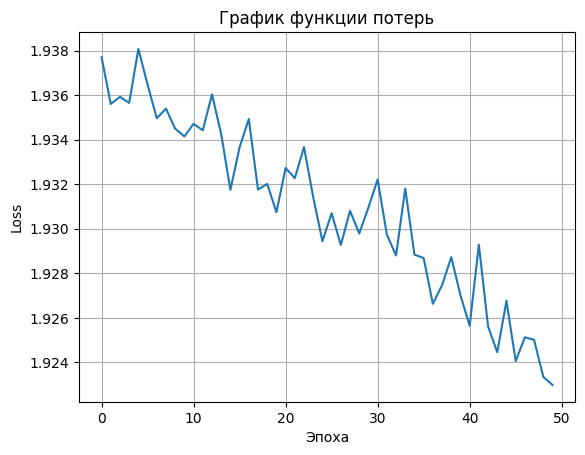

In [ ]:
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("График функции потерь")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
print(np.any(np.isnan(X_train)), np.any(np.isinf(X_train)))

False False


In [ ]:
print("Outputs shape:", outputs.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("Loss:", loss.item())

Outputs shape: torch.Size([2400, 7])
y_train_tensor shape: torch.Size([2400])
Loss: 1.9229871034622192


In [ ]:
print("Predicted class indices:", outputs.argmax(dim=1)[:10])
print("True class indices:", y_train_tensor[:10])

Predicted class indices: tensor([1, 4, 4, 1, 4, 4, 5, 3, 3, 6])
True class indices: tensor([4, 1, 3, 1, 6, 1, 4, 2, 2, 1])


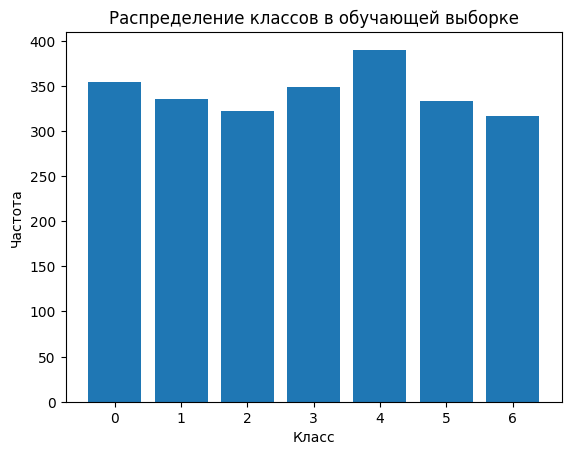

Частоты по классам: {np.int64(0): np.int64(354), np.int64(1): np.int64(335), np.int64(2): np.int64(322), np.int64(3): np.int64(349), np.int64(4): np.int64(390), np.int64(5): np.int64(333), np.int64(6): np.int64(317)}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(range(len(unique)), counts)
plt.title("Распределение классов в обучающей выборке")
plt.xlabel("Класс")
plt.ylabel("Частота")
plt.show()

print("Частоты по классам:", dict(zip(unique, counts)))

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

In [ ]:
print("Min:", X_train_tensor.min().item(), "Max:", X_train_tensor.max().item(), "Mean:", X_train_tensor.mean().item())

Min: -1.7388944625854492 Max: 1.727204442024231 Mean: 0.002991288900375366


In [ ]:
with torch.no_grad():
    sample_out = model(X_train_tensor[:5])
    print(sample_out)

tensor([[-0.1779, -0.1766, -0.2047, -0.2945,  0.1107, -0.2271, -0.2506],
        [ 0.0054, -0.1560, -0.0930, -0.1547,  0.0467, -0.0458, -0.1307],
        [-0.0207,  0.0675, -0.2313,  0.0671,  0.0777, -0.2418, -0.2184],
        [ 0.1223,  0.1986, -0.4319,  0.0556, -0.0965, -0.1404, -0.2524],
        [-0.0862, -0.2904,  0.0462, -0.1476,  0.1931, -0.0549, -0.0745]])


In [ ]:
accuracies = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Accuracy
    predicted = outputs.argmax(dim=1)
    accuracy = (predicted == y_train_tensor).float().mean().item()
    accuracies.append(accuracy)

    print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Accuracy = {accuracy:.4f}")

Epoch 0: Loss = 1.9263, Accuracy = 0.2037
Epoch 1: Loss = 1.9282, Accuracy = 0.2050
Epoch 2: Loss = 1.9260, Accuracy = 0.2033
Epoch 3: Loss = 1.9263, Accuracy = 0.2054
Epoch 4: Loss = 1.9290, Accuracy = 0.1958
Epoch 5: Loss = 1.9271, Accuracy = 0.2021
Epoch 6: Loss = 1.9263, Accuracy = 0.1967
Epoch 7: Loss = 1.9283, Accuracy = 0.1883
Epoch 8: Loss = 1.9251, Accuracy = 0.1946
Epoch 9: Loss = 1.9239, Accuracy = 0.1917
Epoch 10: Loss = 1.9233, Accuracy = 0.2104
Epoch 11: Loss = 1.9242, Accuracy = 0.2008
Epoch 12: Loss = 1.9230, Accuracy = 0.2100
Epoch 13: Loss = 1.9209, Accuracy = 0.2117
Epoch 14: Loss = 1.9228, Accuracy = 0.2033
Epoch 15: Loss = 1.9236, Accuracy = 0.2008
Epoch 16: Loss = 1.9219, Accuracy = 0.1863
Epoch 17: Loss = 1.9222, Accuracy = 0.2004
Epoch 18: Loss = 1.9192, Accuracy = 0.2025
Epoch 19: Loss = 1.9240, Accuracy = 0.1896
Epoch 20: Loss = 1.9184, Accuracy = 0.2000
Epoch 21: Loss = 1.9225, Accuracy = 0.1992
Epoch 22: Loss = 1.9204, Accuracy = 0.1975
Epoch 23: Loss = 1.92

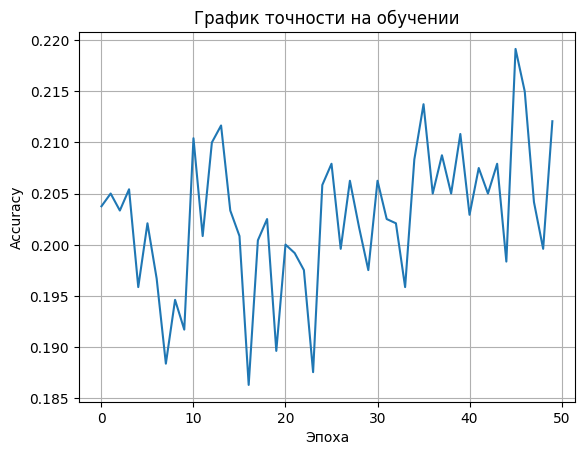

In [ ]:
plt.plot(accuracies)
plt.title("График точности на обучении")
plt.xlabel("Эпоха")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

Средняя accuracy на обучении ≈ 20% (при 7 классах — это чуть выше случайного угадывания: 1/7 ~ 14.3\%).
Наличие скачков и нестабильности — явный признак, что модель пока не научилась извлекать устойчивые зависимости из признаков